In [36]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.options.display.max_colwidth=300

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

import seaborn as sns

#from sklearn.preprocessing import LabelEncoder

#import os

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
df_test = pd.read_csv('application_test.csv')

In [4]:
df.rename(str.lower, axis='columns', inplace=True)

In [5]:
df_col = pd.read_csv('HomeCredit_columns_description.csv', header=0, encoding='unicode_escape')
df_col = df_col[df_col.Table=='application_{train|test}.csv']
df_col.sort_values(by=['Row'], inplace=True)
df_col.iloc[:,2:]

,Row,Description,Special
9,AMT_ANNUITY,Loan annuity,NaN
8,AMT_CREDIT,Credit amount of the loan,NaN
10,AMT_GOODS_PRICE,For consumer loans it is the price of the goods for which the loan is given,NaN
7,AMT_INCOME_TOTAL,Income of the client,NaN
117,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application),NaN
116,AMT_REQ_CREDIT_BUREAU_HOUR,Number of enquiries to Credit Bureau about the client one hour before application,NaN
119,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application),NaN
120,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application),NaN
118,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application),NaN
121,AMT_REQ_CREDIT_BUREAU_YEAR,Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application),NaN


In [6]:
df.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
df.describe()

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,totalarea_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
df.shape

(307511, 122)

In [9]:
df.target.value_counts()

0    282686
1     24825
Name: target, dtype: int64

## Data Type

In [10]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

name_contract_type             2
code_gender                    3
flag_own_car                   2
flag_own_realty                2
name_type_suite                7
name_income_type               8
name_education_type            5
name_family_status             6
name_housing_type              6
occupation_type               18
weekday_appr_process_start     7
organization_type             58
fondkapremont_mode             4
housetype_mode                 3
wallsmaterial_mode             7
emergencystate_mode            2
dtype: int64

In [12]:
objects = pd.DataFrame(df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
objects.reset_index(inplace=True)
objects['index']

0             name_contract_type
1                    code_gender
2                   flag_own_car
3                flag_own_realty
4                name_type_suite
5               name_income_type
6            name_education_type
7             name_family_status
8              name_housing_type
9                occupation_type
10    weekday_appr_process_start
11             organization_type
12            fondkapremont_mode
13                housetype_mode
14            wallsmaterial_mode
15           emergencystate_mode
Name: index, dtype: object

In [13]:
for i in objects['index']:
    print(i)
    print(df[i].unique())

name_contract_type
['Cash loans' 'Revolving loans']
code_gender
['M' 'F' 'XNA']
flag_own_car
['N' 'Y']
flag_own_realty
['Y' 'N']
name_type_suite
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
name_income_type
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
name_education_type
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
name_family_status
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
name_housing_type
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
occupation_type
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers

## Dummy

In [14]:
df2 = df.copy()

In [15]:
df2.code_gender.value_counts()

F      202448
M      105059
XNA         4
Name: code_gender, dtype: int64

In [16]:
df2['code_gender'].replace('XNA', value=np.nan, inplace = True)

In [17]:
df2['male'] = df['code_gender']
df2['male'].replace('M', value=1, inplace = True)
df2['male'].replace('F', value=0, inplace = True)
df2.drop('code_gender', inplace=True, axis=1)

In [18]:
df2['flag_own_car'].replace('Y', value=1, inplace = True)
df2['flag_own_car'].replace('N', value=0, inplace = True)

In [19]:
df2['flag_own_realty'].replace('Y', value=1, inplace = True)
df2['flag_own_realty'].replace('N', value=0, inplace = True)

In [20]:
df2['cash_loan'] = df['name_contract_type']
df2['cash_loan'].replace('Cash loans', value=1, inplace = True)
df2['cash_loan'].replace('Revolving loans', value=0, inplace = True)
df2.drop('name_contract_type', inplace=True, axis=1)

In [21]:
df2['emergencystate_mode'].replace('Yes', value=1, inplace = True)
df2['emergencystate_mode'].replace('No', value=0, inplace = True)

In [22]:
df2 = pd.get_dummies(df2)

## Missing Values

In [23]:
mis_val = df.isnull().sum()
mis_val_percent = 100 * df.isnull().sum() / len(df)

In [24]:
mis_val_percent.sort_values(ascending=False).head(60)

commonarea_medi                 69.872297
commonarea_avg                  69.872297
commonarea_mode                 69.872297
nonlivingapartments_mode        69.432963
nonlivingapartments_medi        69.432963
nonlivingapartments_avg         69.432963
fondkapremont_mode              68.386172
livingapartments_medi           68.354953
livingapartments_mode           68.354953
livingapartments_avg            68.354953
floorsmin_medi                  67.848630
floorsmin_mode                  67.848630
floorsmin_avg                   67.848630
years_build_medi                66.497784
years_build_avg                 66.497784
years_build_mode                66.497784
own_car_age                     65.990810
landarea_mode                   59.376738
landarea_avg                    59.376738
landarea_medi                   59.376738
basementarea_medi               58.515956
basementarea_avg                58.515956
basementarea_mode               58.515956
ext_source_1                    56

In [25]:
correlations = df.corr()['target'].sort_values()
print('\npositive:\n',correlations.tail(15))
print('\nnegative:\n', correlations.head(15))


positive:
 def_60_cnt_social_circle       0.031276
def_30_cnt_social_circle       0.032248
live_city_not_work_city        0.032518
own_car_age                    0.037612
days_registration              0.041975
flag_document_3                0.044346
reg_city_not_live_city         0.044395
flag_emp_phone                 0.045982
reg_city_not_work_city         0.050994
days_id_publish                0.051457
days_last_phone_change         0.055218
region_rating_client           0.058899
region_rating_client_w_city    0.060893
days_birth                     0.078239
target                         1.000000
Name: target, dtype: float64

negative:
 ext_source_3                 -0.178919
ext_source_2                 -0.160472
ext_source_1                 -0.155317
days_employed                -0.044932
floorsmax_avg                -0.044003
floorsmax_medi               -0.043768
floorsmax_mode               -0.043226
amt_goods_price              -0.039645
region_population_relative   -0.037

## Featuring

In [26]:
df2['age'] = df2.days_birth/-365

In [27]:
df2.days_employed.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: days_employed, dtype: float64

In [28]:
df2['employed_mis'] = df2['days_employed'] == 365243
df2['days_employed'].replace(365243, value=np.nan, inplace = True)

In [29]:
df2['employed'] = df2.days_employed/-365

In [30]:
df2.employed.describe()

count    252137.000000
mean          6.531971
std           6.406466
min          -0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: employed, dtype: float64

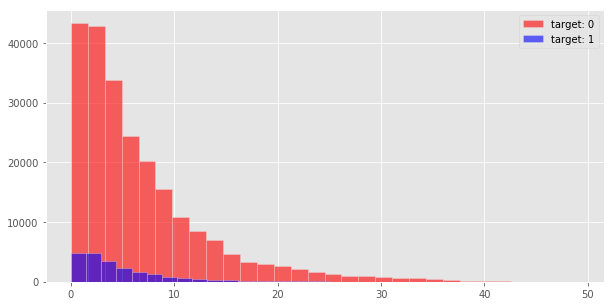

In [40]:
plt.figure(figsize=(10,5))
df2[df2['target']==0]['employed'].hist(bins=30, color='red', label='target: 0', alpha=0.6)
df2[df2['target']==1]['employed'].hist(bins=30, color='blue', label='target: 1', alpha=0.6)
plt.legend()

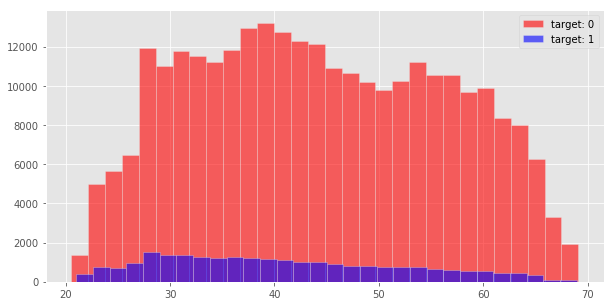

In [38]:
plt.figure(figsize=(10,5))
df2[df2['target']==0]['age'].hist(bins=30, color='red', label='target: 0', alpha=0.6)
df2[df2['target']==1]['age'].hist(bins=30, color='blue', label='target: 1', alpha=0.6)
plt.legend()

In [32]:
TO DOs:
    #How to handle NAN values
    #Create dummies
    #find anomalies: Days employed, ...
    #correlation table/ matrix
    #age bins
    #laufzeit kredite

SyntaxError: invalid syntax (<ipython-input-32-cdae4fa87ec2>, line 1)